In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
train=pd.read_excel('train_flight.xlsx')
test_data=pd.read_excel('test_flight.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
(10862*100)/10863

99.99079443984166

In [6]:
train.info()

#Luckily we have a 99.99 % of non null values so we can drop the null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train.dropna(inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [9]:
train['Journey_day']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.day

train['Journey_month']=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.month

train.drop(train[['Date_of_Journey']],axis=1,inplace=True)

In [10]:
train['DEP_Hr']=pd.to_datetime(train.Dep_Time).dt.hour

train['DEP_min']=pd.to_datetime(train.Dep_Time).dt.minute

train.drop(train[['Dep_Time']],axis=1,inplace=True)

In [11]:
train['Arrival_Hour']=pd.to_datetime(train.Arrival_Time).dt.hour
train['Arrival_Min']=pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(train[['Arrival_Time']],axis=1,inplace=True)

In [12]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [13]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [14]:
train['Duration_hours']=duration_hours
train['Duration_mins']=duration_mins

In [15]:
train.drop(train[['Duration']],axis=1,inplace=True)

<Figure size 720x720 with 0 Axes>

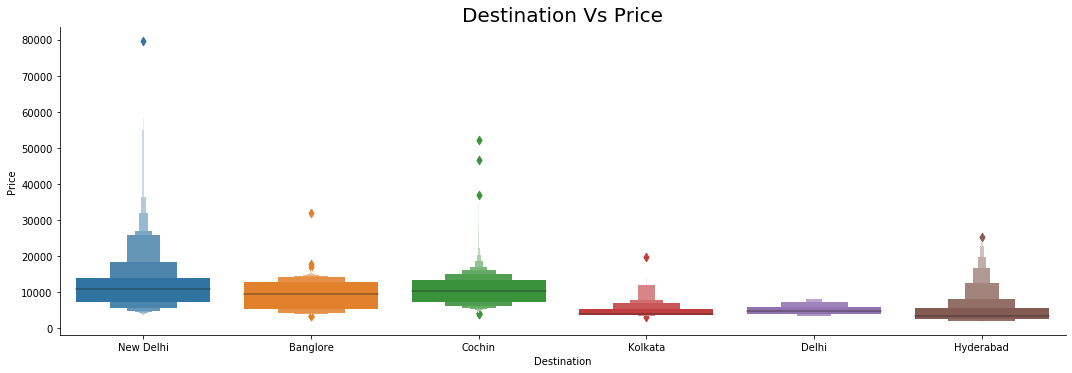

In [16]:
# For which Destination is priced high
plt.figure(figsize=(10,10))
sns.catplot(x='Destination',y='Price',data=train,kind='boxen',height=5,aspect=3)
plt.title("Destination Vs Price",loc='center',fontsize=20)
plt.show()

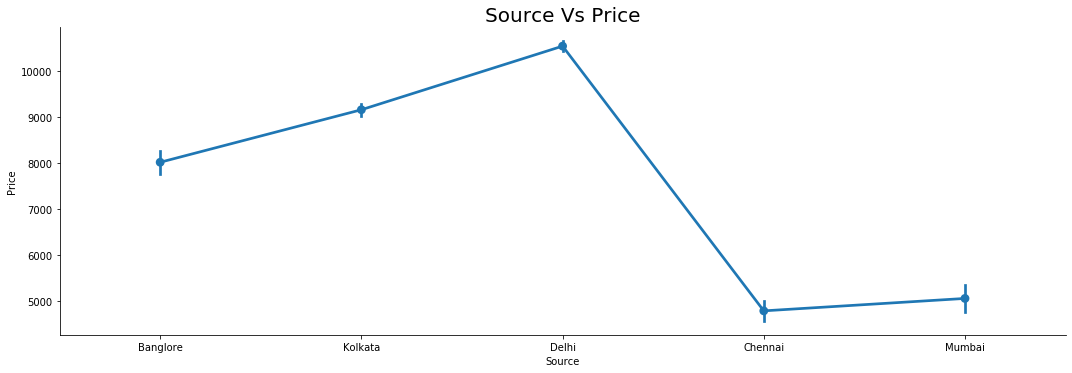

In [17]:
#From which source is the price high
sns.catplot(x='Source',y='Price',data=train,aspect=3,kind='point',height=5)
plt.title("Source Vs Price",loc='center',fontsize=20)
plt.show()

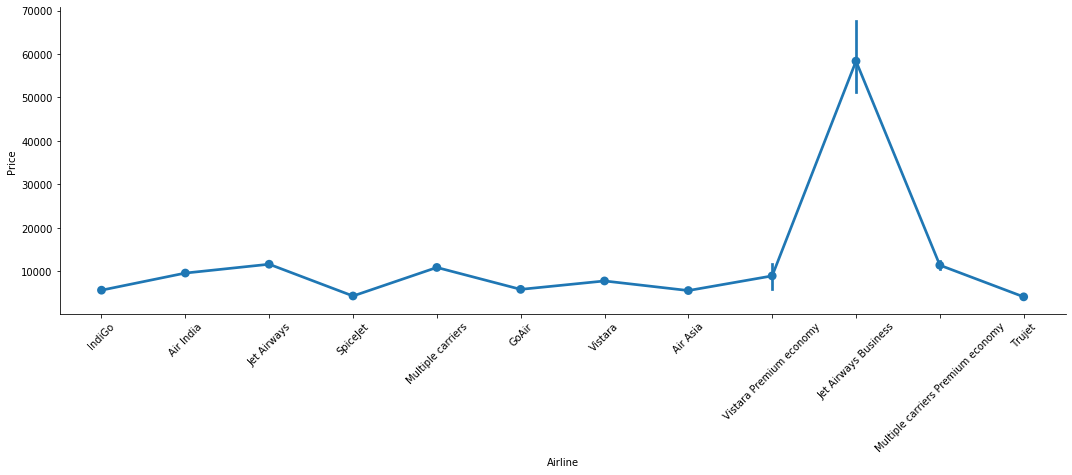

In [18]:
#Which airways has highest rate
sns.catplot(x='Airline',y='Price',kind='point',data=train,height=5,aspect=3)
plt.xticks(rotation=45)
plt.show()

### As route is the path b/w source and destination and if there is a stop b/w source and destination 
it is seen in total stops columns.So we can drop the Route column.
Thr columns Additional Info column has more than 80% of columns with 'No Info' which potentially is a NA value in terms.so we can drop them

In [19]:
train.drop(train[['Additional_Info','Route']],axis=1,inplace=True)

In [20]:
#Now comes encoding part
#train.info()
cat_cols=train.select_dtypes(include=[np.object])
print(cat_cols.columns)

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')


In [21]:
#df_train=pd.get_dummies(train,drop_first=True)

In [22]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,DEP_Hr,DEP_min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [23]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'DEP_Hr', 'DEP_min', 'Arrival_Hour',
       'Arrival_Min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [24]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [25]:
Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [28]:
final_train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [29]:
final_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [30]:
final_train

,Total_Stops,Price,Journey_day,Journey_month,DEP_Hr,DEP_min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [31]:
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.day

test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format='%d/%m/%Y').dt.month

test_data.drop(test_data[['Date_of_Journey']],axis=1,inplace=True)

In [32]:
test_data['DEP_Hr']=pd.to_datetime(test_data.Dep_Time).dt.hour

test_data['DEP_min']=pd.to_datetime(test_data.Dep_Time).dt.minute

test_data.drop(test_data[['Dep_Time']],axis=1,inplace=True)

In [33]:
test_data['Arrival_Hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_Min']=pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(test_data[['Arrival_Time']],axis=1,inplace=True)

In [34]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [35]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [36]:
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins

In [37]:
test_data.drop(test_data[['Duration']],axis=1,inplace=True)

In [38]:
test_data.drop(test_data[['Additional_Info','Route']],axis=1,inplace=True)

In [39]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

In [41]:
final_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [42]:
final_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [43]:
final_test

,Total_Stops,Journey_day,Journey_month,DEP_Hr,DEP_min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [86]:
final_train.drop(final_train[['Airline_Trujet']],axis=1,inplace=True)

In [87]:
len(final_train.columns)

29

In [88]:
final_test.columns=['Total_Stops', 'Journey_day', 'Journey_month', 'DEP_Hr',
       'DEP_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']

In [89]:
final_train

,Total_Stops,Price,Journey_day,Journey_month,DEP_Hr,DEP_min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [90]:
final_test

,Total_Stops,Journey_day,Journey_month,DEP_Hr,DEP_min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [91]:
X=final_train.drop(train[['Price']],axis=1)

In [92]:
Y=final_train['Price']

In [93]:
#To validate we will split the train data into train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [94]:
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

X_train shape:  (7477, 28)
Y_train shape:  (7477,)
X_test shape:  (3205, 28)
Y_test shape:  (3205,)


In [95]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 

In [96]:
from xgboost import XGBRegressor

In [97]:
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [98]:
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
gb.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
xgb.fit(X_train,Y_train)

[22:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [101]:
pred=rf.predict(X_test)

In [102]:
pred_gb=gb.predict(X_test)

In [103]:
pred_XGB=xgb.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
print('------------------------------------------RF Scores---------------------------------------------')
print('Train_SCore :',rf.score(X_train,Y_train))
print('Test_SCore :' ,rf.score(X_test,Y_test))
print('------------------------------------------GB Scores---------------------------------------------')
print('Train_SCore : ',gb.score(X_train,Y_train))
print('Test_SCore : ' ,gb.score(X_test,Y_test))
print('------------------------------------------XGB Scores---------------------------------------------')
print('Train_SCore :',xgb.score(X_train,Y_train))
print('Test_SCore :' ,xgb.score(X_test,Y_test))

------------------------------------------RF Scores---------------------------------------------
Train_SCore : 0.955264243763865
Test_SCore : 0.8018658071041687
------------------------------------------GB Scores---------------------------------------------
Train_SCore :  0.7862992365048503
Test_SCore :  0.7908946808623519
------------------------------------------XGB Scores---------------------------------------------
Train_SCore : 0.7793832735583001
Test_SCore : 0.7852421674260164


Text(0.5, 1.0, 'Random Forest')

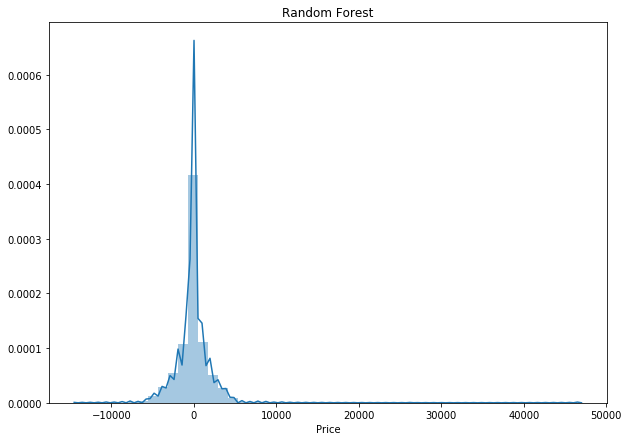

In [106]:
plt.figure(figsize=(10,7))
sns.distplot(Y_test-pred)
plt.title('Random Forest')

Text(0.5, 1.0, 'Gradient Boosting')

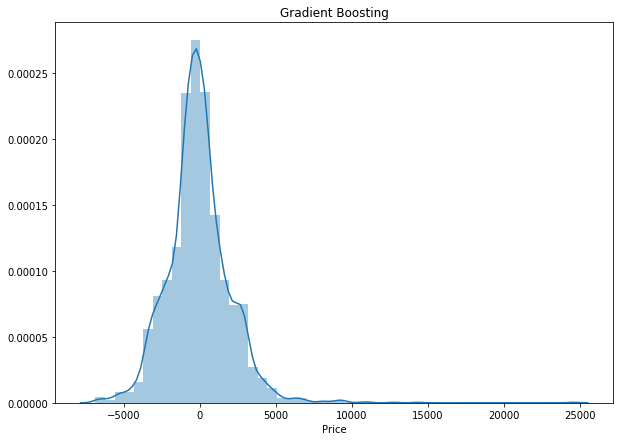

In [107]:
plt.figure(figsize=(10,7))
sns.distplot(Y_test-pred_gb)
plt.title('Gradient Boosting')

Text(0.5, 1.0, 'XGBoosting')

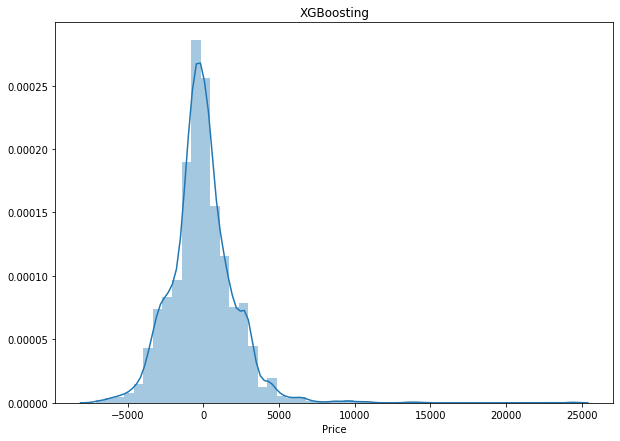

In [108]:
plt.figure(figsize=(10,7))
sns.distplot(Y_test-pred_XGB)
plt.title('XGBoosting')

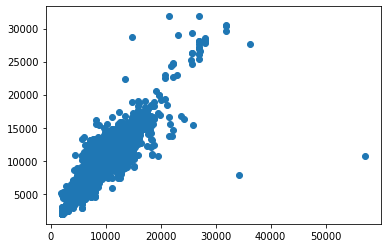

In [109]:
plt.scatter(Y_test,pred)

In [110]:
import plotly.express as px

In [111]:
fig=px.scatter(x=Y_test,y=pred)

fig.show()

In [112]:
fig=px.scatter(x=Y_test,y=pred_gb)

fig.show()

In [113]:
fig=px.scatter(x=Y_test,y=pred_XGB)
fig.show()

Hyper parameter tuning for better results

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=7)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [116]:
rf_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [117]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,scoring='neg_mean_squared_error',n_iter=10,
                             cv=5,verbose=2,random_state=42,n_jobs=1)

In [118]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.3s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=9 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=9, total=   2.9s
[CV] n_estimators=900, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [119]:
xgb_random=RandomizedSearchCV(estimator = xgb, param_distributions = rf_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2,
                                random_state=42, n_jobs = 1)

In [120]:
xgb_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[22:32:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  25.6s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[22:33:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  24.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[22:33:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  24.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[22:34:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  24.6s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[22:34:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estim

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25, 30],
                                        'max_feat

In [121]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 21}

In [122]:
predRF=rf_random.predict(X_test)

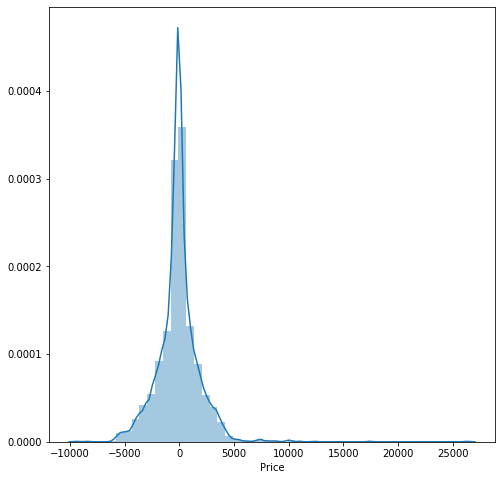

In [123]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-predRF)
plt.show()

In [124]:
xgb_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [125]:
predXGB=xgb_random.predict(X_test)

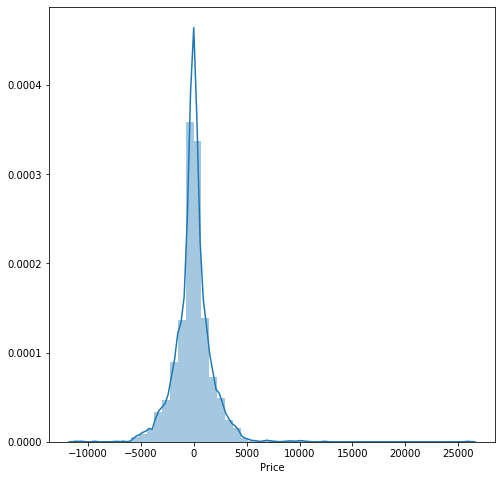

In [126]:
plt.figure(figsize = (8,8))
sns.distplot(Y_test-predXGB)
plt.show()

In [127]:
rf_random.predict(final_test)

array([10646.38573564,  4290.593     , 14902.67403739, ...,
       14747.62380076, 12400.38414951,  8148.03278927])